In [1]:
from sklearn import datasets #加载数据集
iris = datasets.load_iris()

In [2]:
X=iris.data  #拆分特征与标签
y=iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [4]:
from sklearn.tree import DecisionTreeClassifier  #树-决策树回归器
tree = DecisionTreeClassifier(random_state=66,min_samples_leaf=5)  #实例化
tree.fit(X_train,Y_train)  

DecisionTreeClassifier(min_samples_leaf=5, random_state=66)

In [5]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree,X,y   #交叉验证评分
                ,cv=5     #分成五组(K=5)
                ,scoring="accuracy"     #判断准确度
               ).mean()   #取平均值
score

0.9400000000000001

In [6]:
#中文的特征名与类名
feature_names=["花萼长度(cm)","花萼宽度(cm)","花瓣长度(cm)","花瓣宽度(cm)"]
target_names=["山鸢尾","变色鸢尾","维吉尼亚鸢尾"]
# 可视化决策树
import codecs
from sklearn.tree import export_graphviz


with codecs.open("./dot/iris_tree.dot",'w') as f:
     f = export_graphviz(tree,  #模型
                              out_file=f,  #输出至
                              feature_names=feature_names,  #特征名称
                              class_names=target_names,  #类名称
                              rounded = True,  #是否是角轮廓
                              filled= True )   #是否填充颜色

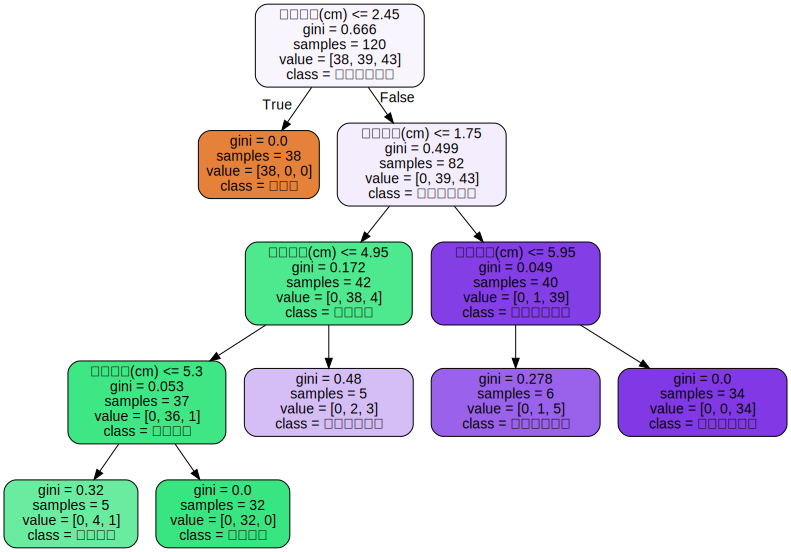

In [7]:
import graphviz

with open("./dot/iris_tree.dot","r") as f:
    dot_graph = f.read()
dot=graphviz.Source(dot_graph)
dot

In [8]:
import pandas as pd
predict,test=[],[]

for i in range(len(tree.predict(X_test))):  #预测结果转文字
    predict.append(target_names[tree.predict(X_test)[i]])
    
for i in range(len(Y_test)):     #实际结果转文字
    test.append(target_names[Y_test[i]])

pd.concat([pd.DataFrame(X_test,columns=feature_names),
           pd.DataFrame(predict,columns=["预测分类"]),
           pd.DataFrame(test,columns=["实际分类"])],
           axis=1)

,花萼长度(cm),花萼宽度(cm),花瓣长度(cm),花瓣宽度(cm),预测分类,实际分类
0,6.0,2.9,4.5,1.5,变色鸢尾,变色鸢尾
1,5.7,2.8,4.1,1.3,变色鸢尾,变色鸢尾
2,5.0,3.3,1.4,0.2,山鸢尾,山鸢尾
3,6.8,2.8,4.8,1.4,变色鸢尾,变色鸢尾
4,5.7,3.8,1.7,0.3,山鸢尾,山鸢尾
5,7.2,3.0,5.8,1.6,维吉尼亚鸢尾,维吉尼亚鸢尾
6,6.0,2.2,4.0,1.0,变色鸢尾,变色鸢尾
7,6.5,3.0,5.2,2.0,维吉尼亚鸢尾,维吉尼亚鸢尾
8,5.8,2.7,4.1,1.0,变色鸢尾,变色鸢尾
9,4.6,3.4,1.4,0.3,山鸢尾,山鸢尾


In [9]:
print("准确度：{:.2f}%".format(score*100))

准确度：94.00%
